<a href="https://colab.research.google.com/github/HongJeongHwan/MachineLearning/blob/main/%EC%8B%A4%EC%8A%B504_%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#§ 보스턴 집값 예측

##■ 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

In [ ]:
file_path = '/content/drive/MyDrive/KDT/04. 머신러닝/02. Data파일/house_price.csv'
df_boston = pd.read_csv(file_path,index_col=0)
print(df_boston)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

##■ 데이터 전처리

###→ 누락 데이터 처리

In [ ]:
# 각 컬럼별 누락 데이터의 수 확인
num_nulls = df_boston.isnull().sum()
print(f'각 컬럼별 누락 데이터의 수 :\n{num_nulls}')

각 컬럼별 누락 데이터의 수 :
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
# 기본 정보 확인
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


###→ 이상치 처리

crim 컬럼 이상치 시각화


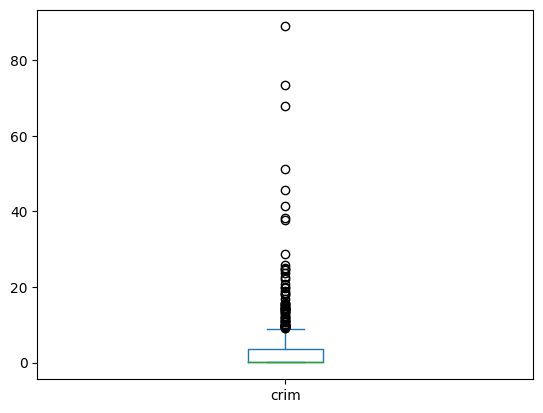

zn 컬럼 이상치 시각화


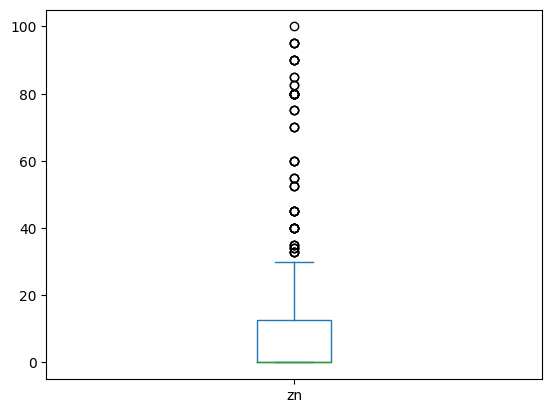

rm 컬럼 이상치 시각화


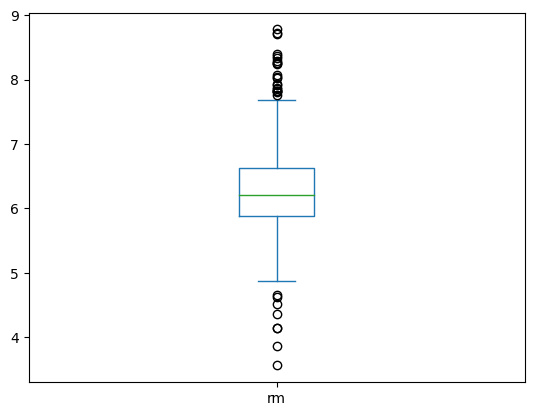

In [ ]:
# boxplot을 이용한 이상치 시각화

# crim 컬럼
print('crim 컬럼 이상치 시각화')
df_boston.loc[:,'crim'].plot(kind='box')
plt.show()

# zn 컬럼
print('zn 컬럼 이상치 시각화')
df_boston.loc[:,'zn'].plot(kind='box')
plt.show()

# rm 컬럼
print('rm 컬럼 이상치 시각화')
df_boston.loc[:,'rm'].plot(kind='box')
plt.show()

# 3컬럼 모두 이상치 제거하면 남는게 없다.

###→ EDA(Exploratary Data Analysis)

####: 주택가격과 crim컬럼의 관계 분석`

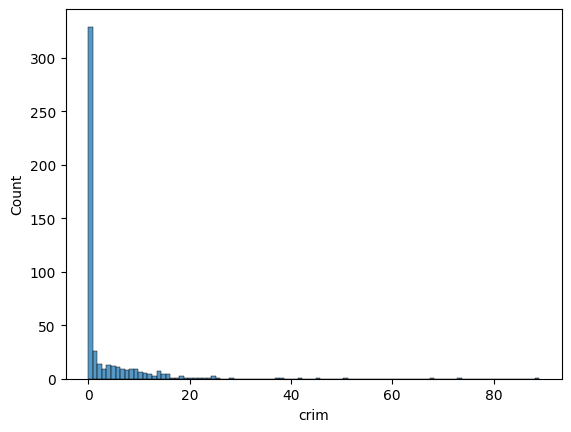

In [ ]:
# crim 컬럼 시각화
'''
crim : town별 1인당 범죄율
'''
# print(df_boston.loc[:,'crim']) : 연속형이니까 histplot으로 그려보자
sns.histplot(data=df_boston,x='crim')
plt.show()

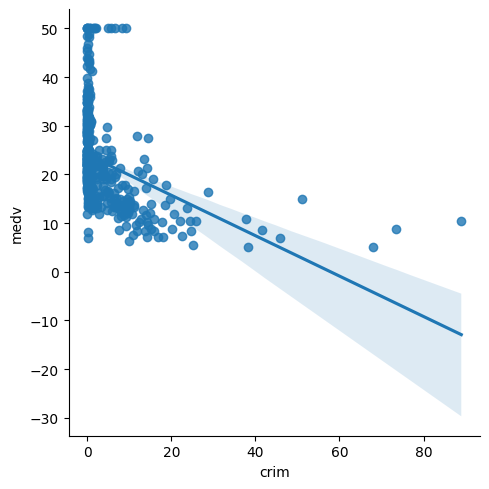

In [ ]:
# 주택가격과 crim 컬럼의 관계 시각화
sns.lmplot(data=df_boston,x='crim',y='medv')
plt.show()

####: 주택가격과 zn컬럼의 관계 분석

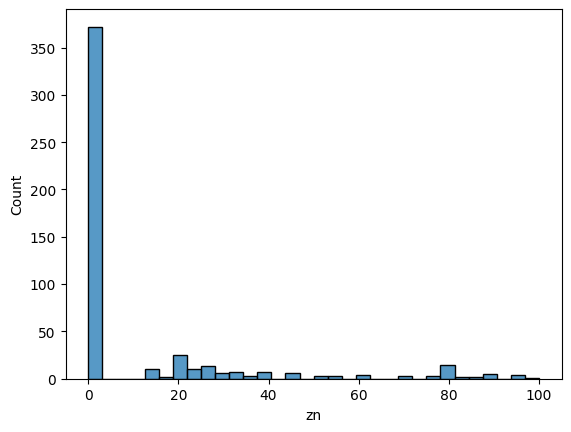

In [ ]:
# zn컬럼의
'''
zn : 25,000 평방피트(700평)를 초과하는 거주지역의 비율
'''
sns.histplot(data=df_boston,x='zn')
plt.show()

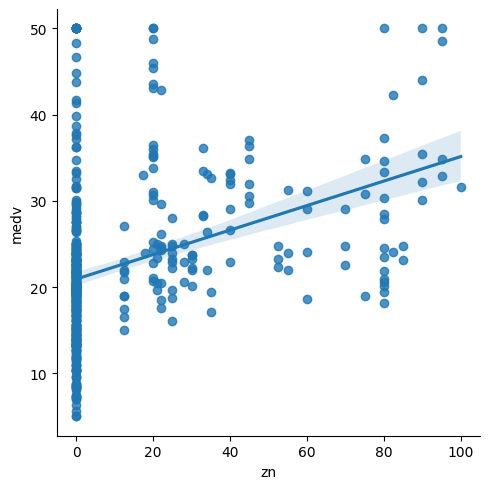

In [ ]:
# 주택가격과 zn 컬럼의 관계 분석
sns.lmplot(data=df_boston,x='zn',y='medv')
plt.show()

####: 주택가격과 indus 컬럼의 관계 분석

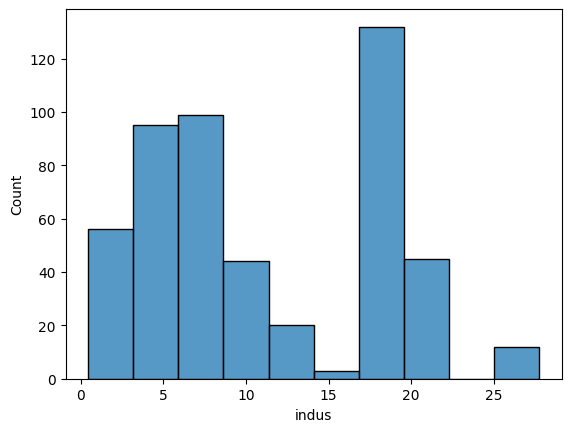

In [ ]:
# indus 컬럼의 분포 시각화
'''
indus : 비소매상업지역(=농지)이 점유하고 있는 토지의 비율
'''
sns.histplot(data=df_boston,x='indus')
plt.show()

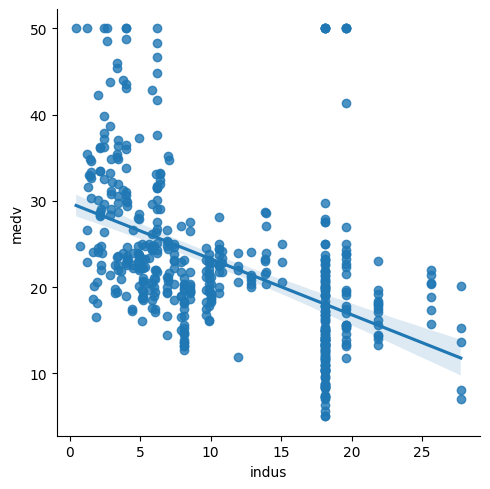

In [ ]:
# 주택가격과 indus 컬럼의 관계 분석
sns.lmplot(data=df_boston,x='indus',y='medv')
plt.show()

####: 주택가격과 chas 컬럼의 관계 분석

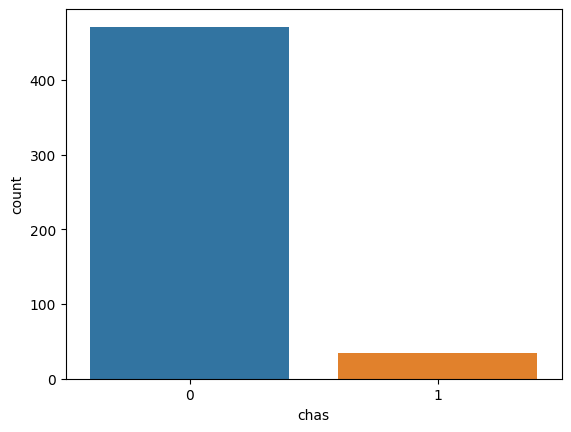

chas 컬럼 항목별 비율 :
0    0.93083
1    0.06917
Name: chas, dtype: float64



In [ ]:
# chas 컬럼의 분포 시각화
'''
chas : 찰스강의 경계에 위치한 경우 : 1, 아니면 : 0
'''
sns.countplot(data=df_boston,x='chas')
plt.show()

# chas 컬럼 항목별 비율 추출
print(f'chas 컬럼 항목별 비율 :\n{df_boston.loc[:,"chas"].value_counts(normalize=True).sort_index(ascending=True)}\n')

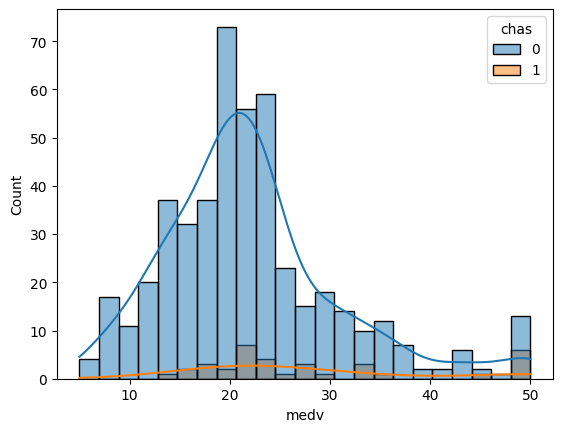

In [ ]:
# 주택가격과 chas 컬럼의 관계 시각화
sns.histplot(data=df_boston,x='medv',hue='chas', kde=True)
plt.show()

####: 주택가격과 nox 컬럼의 관계 분석

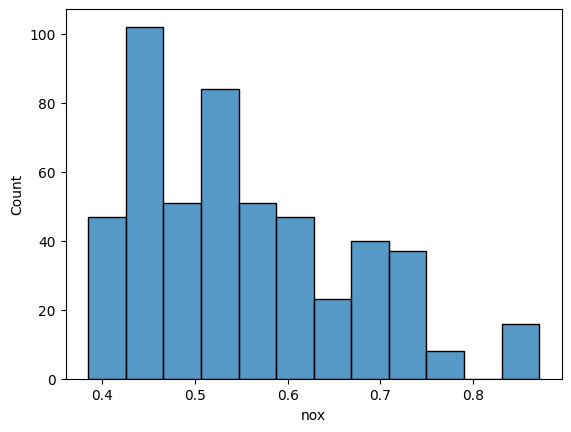

In [ ]:
# nox 컬럼의 분포 시각화
'''
nox : 일산화질소 농도
'''
sns.histplot(data=df_boston,x='nox')
plt.show()

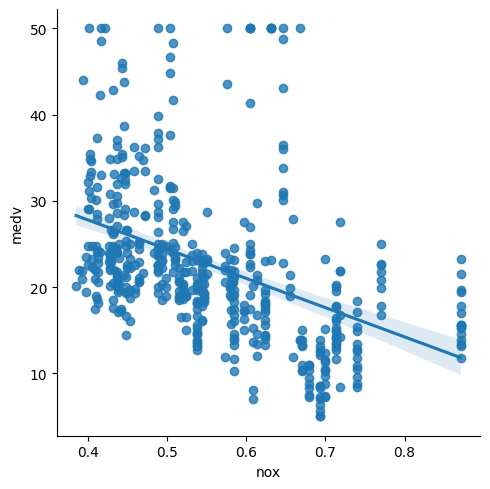

In [ ]:
# 주택가격과 nox 컬럼의 관계 확인
sns.lmplot(data=df_boston,x='nox',y='medv')
plt.show()

####: 주택가격과 rm 컬럼의 관계 분석

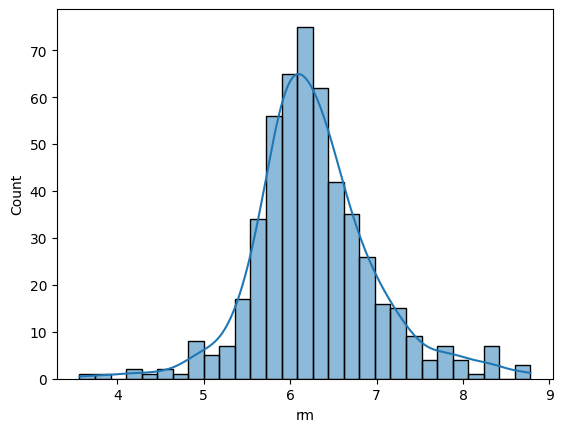

In [ ]:
# rm 컬럼의 분포 시각화
'''
rm : 주택 1가구당 평균 방의 개수
'''
sns.histplot(data=df_boston,x='rm',kde=True)
plt.show()

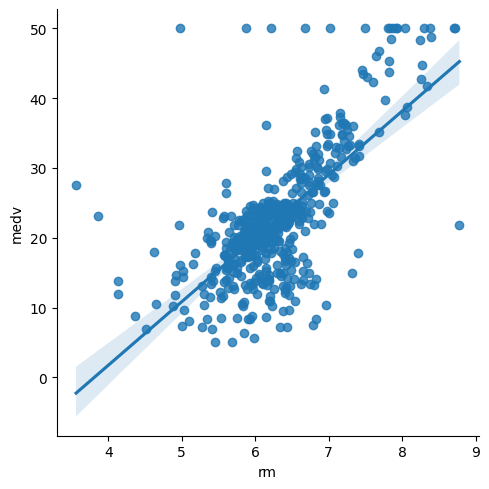

In [ ]:
# 주택가격과 rm 컬럼의 관계 확인
sns.lmplot(data=df_boston,x='rm',y='medv')
plt.show()

####: 주택가격과 age 컬럼의 관계 분석


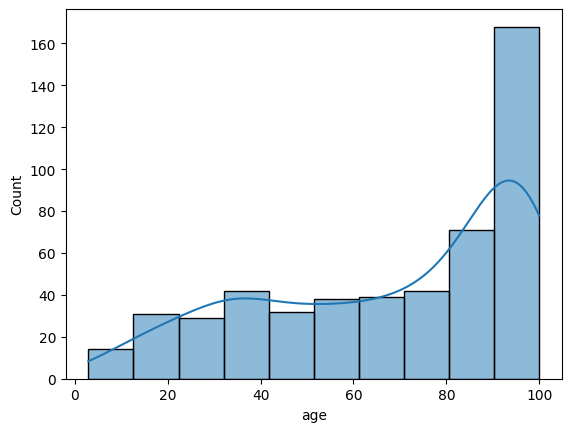

In [ ]:
# age 컬럼의 분포 시각화
'''
age : 1940년 이전에 건축된 주택의 비율
'''
sns.histplot(data=df_boston,x='age',kde=True)
plt.show()

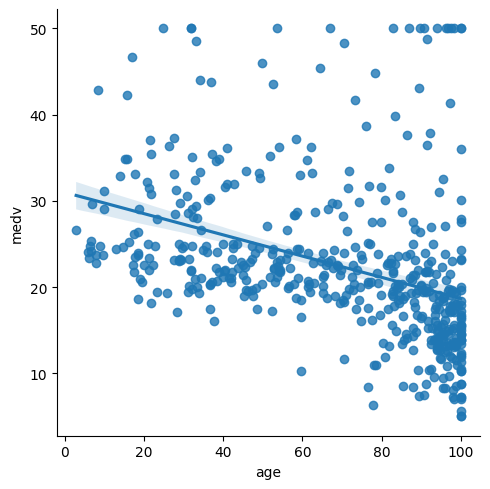

In [ ]:
# 주택가격과 age 컬럼의 관계 분석
# df_boston.age.value_counts()
sns.lmplot(data=df_boston,x='age',y='medv')
plt.show()

####: 주택가격과 dis 컬럼의 관계 분석

In [ ]:
# dis 컬럼의 요약 통계량 확인
df_boston.dis.describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

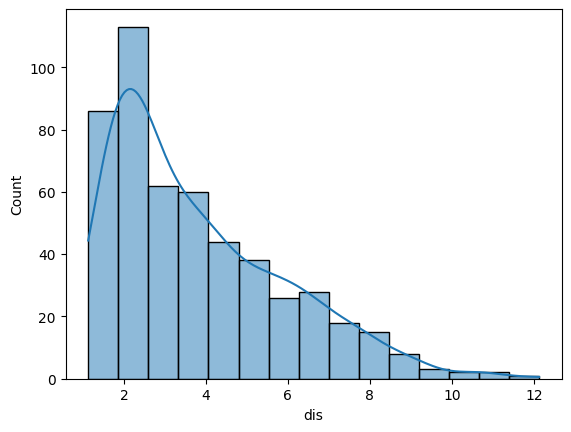

In [ ]:
# dis 컬럼의 분포 시각화
'''
dis : 5가지 보스턴시 직업센터까지의 접근성 지수
'''
# sns.countplot(data=df_boston,x='dis')
# df_boston.dis.value_counts()
sns.histplot(data=df_boston,x='dis',kde=True)
plt.show()

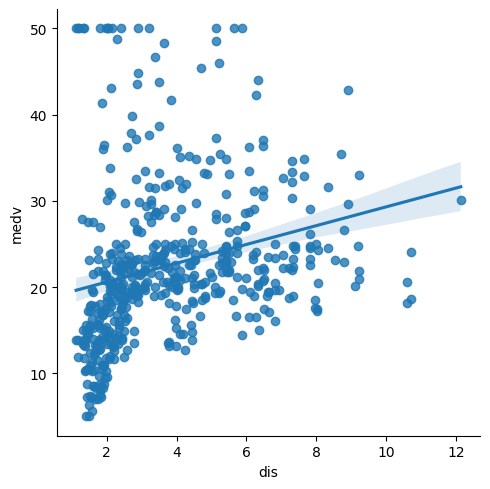

In [ ]:
# 주택가격과 dis 컬럼의 관계 분석
sns.lmplot(data=df_boston,x='dis',y='medv')
plt.show()

####: 주택가격과 rad 컬럼의 관계 분석

In [ ]:
# rad 컬럼의 요약 통계량
df_boston.rad.describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

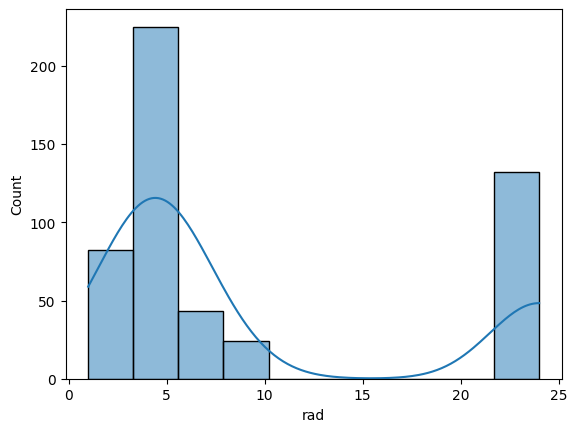

In [ ]:
# rad 컬럼의 분포 시각화
'''
rad : 방사형(순환고속) 도로까지의 접근 용이성 지수
낮을수록 접근성이 좋음.
'''
sns.histplot(data=df_boston,x='rad',kde=True)
plt.show()

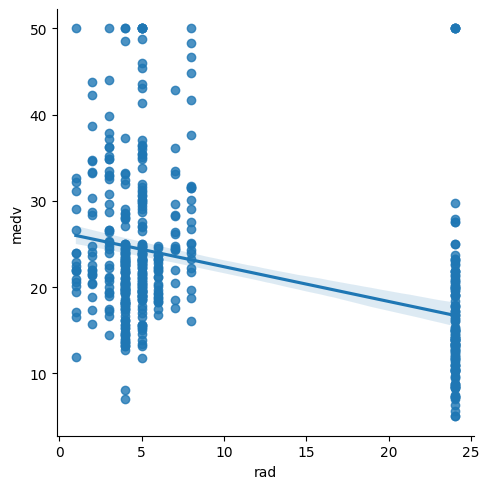

In [ ]:
# 주택가격과 rad 컬럼의 관계 분석
sns.lmplot(data=df_boston,x='rad',y='medv')
plt.show()

####: 주택가격과 tax 컬럼의 관계 분석

In [ ]:
# tax 컬럼의 요약 통계량
df_boston.tax.describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

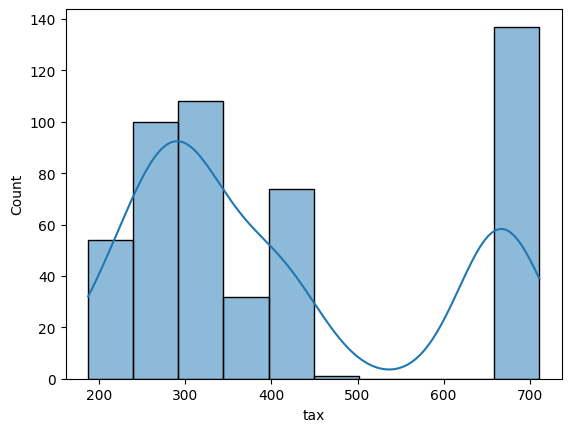

In [ ]:
# tax 컬럼의 분포 시각화
'''
tax : 10,000달러당 세율
'''
sns.histplot(data=df_boston,x='tax',kde=True)
plt.show()

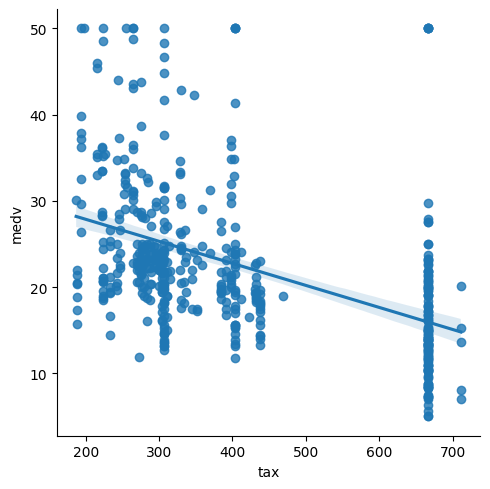

In [ ]:
# 주택가격과 tax 컬럼의 관계 분석
sns.lmplot(data=df_boston,x='tax',y='medv')
plt.show()

####: 주택가격과 ptratio 컬럼의 관계 분석

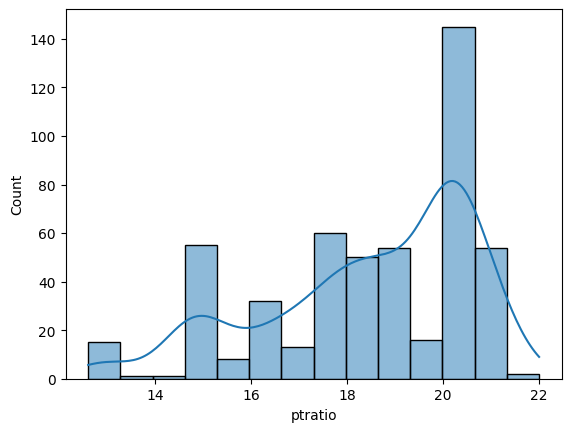

In [ ]:
#  ptratio 컬럼의 분포 시각화
'''
ptratio : pupil-teacher ratio by town(교사 1인당 평균학생의 수)
'''
sns.histplot(data=df_boston,x='ptratio',kde=True)
plt.show()

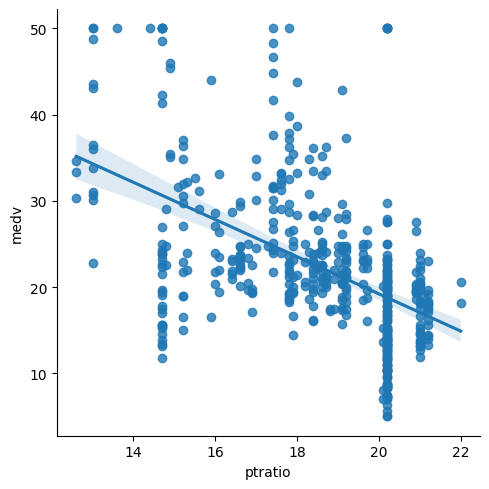

In [ ]:
# 주택가격과 ptratio 컬럼의 관계 분석
sns.lmplot(data=df_boston,x='ptratio',y='medv')
plt.show()

####: 주택가격과 b 컬럼의 관계 분석

In [ ]:
# b 컬럼의 요약 통계량
df_boston.b.describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: b, dtype: float64

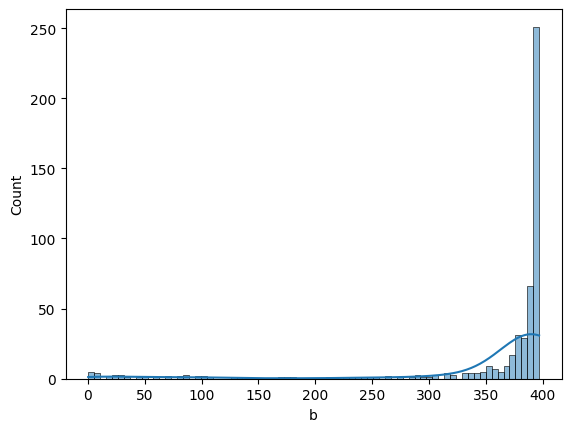

In [ ]:
# b 컬럼의 분포 시각화
'''
b : 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인(Black)의 비율
흑인의 비율이 높을수록 b의 값은 작아진다.
Bk : 0.3 vs 0.5 =>
'''
sns.histplot(data=df_boston,x='b',kde=True)
plt.show()

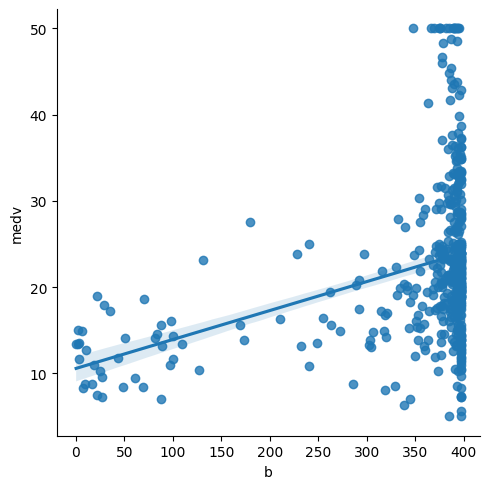

In [ ]:
# 주택가격과 b 컬럼의 관계 분석
sns.lmplot(data=df_boston,x='b',y='medv')
plt.show()

####: 주택가격과 lstat 컬럼의 관계 분석

In [ ]:
# lstat 컬럼의 요약 통계량
df_boston.lstat.describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

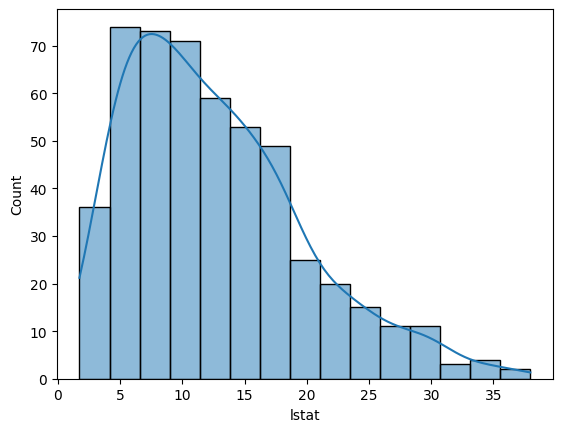

In [ ]:
# lstat 컬럼의 분포 시각화
'''
lstat : % lower status of the population, 급여가 낮은 직업에 종사하는 인구 비율(%)
'''
sns.histplot(data=df_boston,x='lstat',kde=True)
plt.show()

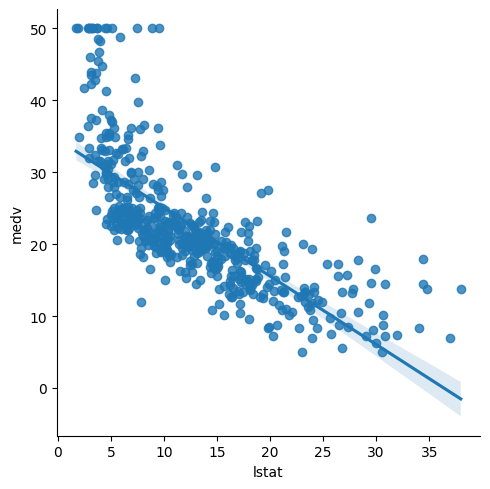

In [ ]:
# 주택가격과 lstat 컬럼의 관계 분석
sns.lmplot(data=df_boston,x='lstat',y='medv')
plt.show()

##■ 학습용/평가용 데이터 생성

In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [ ]:
X_Data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
# 75:25 의 비율로 학습용 데이터와 평가용 데이터 생성
# 필요한 함수 임포트
# from sklearn.model_selection import train_test_split

# X_data, y_data 생성
X_data = df_boston.iloc[:,0:13]
X_data = df_boston.drop(columns=['medv'])
print(f'X_data 확인 : \n{X_data}\n')
y_data = df_boston.iloc[:,-1]
print(f'y_data 확인 : \n{y_data}\n')
# y_Data.info()

# 범주가 아니기 때문에 stratify는 사용하지 않는다.
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=0)

X_data 확인 : 
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83

In [ ]:
# 학습용 데이터의 모양과 인덱스 확인
# .shape로 확인가능한 자료형 : ndarray, dataframe, series

print(f'X_train의 shape : {X_train.shape}, y_train의 shape : {y_train.shape}\n')
print(f'X_train의 shape : {X_train.shape}, y_train의 shape : {y_train.shape}\n')
print(f'X_train 인덱스 확인 : {X_train.index}\n')
print(f'y_train 인덱스 확인 : {y_train.index}\n')

X_train의 shape : (379, 13), y_train의 shape : (379,)

X_train 인덱스 확인 : Int64Index([245,  59, 276, 395, 416, 491, 170, 419,  55, 235,
            ...
            211,   9, 359, 195, 251, 323, 192, 117,  47, 172],
           dtype='int64', length=379)

y_train 인덱스 확인 : Int64Index([245,  59, 276, 395, 416, 491, 170, 419,  55, 235,
            ...
            211,   9, 359, 195, 251, 323, 192, 117,  47, 172],
           dtype='int64', length=379)



### 데이터 스케일링(Data Scaling)

In [ ]:
'''
# 데이터 전처리하는 개념
# MinMaxScaling : Data의 최대값을 1로, 최소값을 0으로 변환(0~1 사이의 값으로 스케일 변환)
# 선형회귀에서만 사용, 정규분포에 가까울수록 잘 맞는다.
# fit,transform(x)할때 x는 X_Data를 사용해도 되지만, 가능하면 X_train을 사용하는게 좋다.

# MinMaxScaling.fit(X) : X데이터의 분포상태 확인(최소값, 최대값 등)
# MinMaxScaling.transform(X) : X데이터의 스케일링

# 정답(y_Data)은 원칙적으로 손대지 않고, X_Data만 스케일링 한다.
# 만약 y_Data를 손대면 원래대로 변형이 필요, 만약 하지 않으면 오차범위의 왜곡이 발생한다.

# 선형회귀 : 머신러닝의 개념은 아니라 통계기반 모델링으로 본다.
# 전문적 통계프로그램(SPSS)을 사용하지 않으면 보정해야할 것이 많다.
# 예를들어, python의 statsmodels를 사용해서 기본적인 통계값을 구할 수 있지만, Data가 정규분포와 가깝지 않을 경우
# 정규화 과정을 별도로 거쳐야 한다. 또한 특성별 기준치가 통계적으로 유의미한지 확인해서 제거할 것은 일일이 제거해야 한다.

# SPSS는 이러한 일련의 과정을 자동으로 해주는 기능이 있다.
# 선형회귀 즉, 사실상 직선으로는 유의미한 예측을 기대하기 어렵다.
'''
# 필요한 함수 임포트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 함수 호출
scaler = MinMaxScaler() # <-- 일종의 모델

# 학습용 데이터에 대한 스케일링 실행
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train_scaled)
X_train_scaled = scaler.fit_transform(X_train)  # <-- 위의 fit과 transform을 한번에 해주는 함수

# 평가용 데이터에 대한 스케일링 실행
X_test_scaled = scaler.transform(X_test)

# 결과 확인
print(f'학습용 데이터에 대한 스케일링에 대한 결과 :\n{X_train_scaled}\n')
print(f'평가용 데이터에 대한 스케일링에 대한 결과 :\n{X_test_scaled}\n')

'''
결과값은 0과 1사이의 값이 나와야 한다.
'''

학습용 데이터에 대한 스케일링에 대한 결과 :
[[0.00207947 0.22       0.19794721 ... 0.69148936 0.98040748 0.47460993]
 [0.00108981 0.25       0.17118768 ... 0.75531915 1.         0.21248227]
 [0.00110566 0.4        0.2181085  ... 0.53191489 0.98071007 0.12255319]
 ...
 [0.00162594 0.         0.35007331 ... 0.55319149 0.99397347 0.24312057]
 [0.0025059  0.         0.23643695 ... 0.56382979 0.98951031 0.48425532]
 [0.00149286 0.         0.13159824 ... 0.42553191 1.         0.36765957]]

평가용 데이터에 대한 스케일링에 대한 결과 :
[[6.84726112e-04 0.00000000e+00 1.01906158e-01 ... 4.57446809e-01
  9.45307378e-01 1.59148936e-01]
 [1.03697791e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  9.22462051e-01 2.21276596e-01]
 [1.21310718e-03 0.00000000e+00 4.92302053e-01 ... 4.04255319e-01
  9.92031873e-01 2.48794326e-01]
 ...
 [3.85613648e-03 0.00000000e+00 3.46041056e-01 ... 6.17021277e-01
  9.98335771e-01 2.33758865e-01]
 [1.03596858e-03 0.00000000e+00 9.23387097e-01 ... 6.91489362e-01
  9.55822280e-01 4.49645390e-01]
 [7

In [ ]:
X_train_scaled[0].min()
X_train_scaled[0].max()
df_X_train_scaled = pd.DataFrame(data=X_train_scaled)
df_X_train_scaled.describe()



,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.038287,0.118615,0.389425,0.065963,0.352182,0.527243,0.678019,0.238099,0.365722,0.412647,0.626565,0.903949,0.306845
std,0.092820,0.238101,0.257386,0.248546,0.239051,0.132859,0.290573,0.191278,0.377221,0.326946,0.233188,0.224846,0.204333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000774,0.000000,0.167889,0.000000,0.131687,0.449032,0.436148,0.084562,0.130435,0.169847,0.510638,0.947615,0.140993
50%,0.002892,0.000000,0.296921,0.000000,0.314815,0.511209,0.774459,0.186399,0.173913,0.270992,0.691489,0.987468,0.269220
75%,0.038118,0.200000,0.646628,0.000000,0.506173,0.596858,0.936148,0.359970,1.000000,0.914122,0.808511,0.997630,0.434043
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##■ LinearRegression 모델을 이용한 주택가격 예측

###→ 모델생성

In [ ]:
# 01. 필요한 함수 임포트
# from sklearn.linear_model import LinearRegression

# 모델 생성함수 호출, 모델 생성
lr = LinearRegression()

###→ 모델학습


In [ ]:
# 모델 학습
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# 학습의 결과 --> 선형 모델의 기울기 / 절편 확인
# 기울기, 가중치(weight), coefficient
print(f'선형모델(LinearRegression)의 직선의 기울기 :\n{lr.coef_}\n')
# 절편
print(f'선형모델(LinearRegression)의 직선의 절편 : {lr.intercept_}\n')
# X_train.columns
'''
-1.17735289e-01 : -1.17735289 * 10의 -1승
0에 가까울수록 가격결정에 영향력이 적다.
'''

선형모델(LinearRegression)의 직선의 기울기 :
[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]

선형모델(LinearRegression)의 직선의 절편 : 36.93325545711923



###→ 학습용/평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터를 이용한 예측
pred_train = lr.predict(X_train)
# 평가용 데이터를 이용한 예측
pred_test = lr.predict(X_test)

print(f'학습용 데이터를 이용한 주택가격 예측결과 :\n{pred_train}\n')
print(f'평가용 데이터를 이용한 주택가격 예측결과 :\n{pred_test}\n')

학습용 데이터를 이용한 주택가격 예측결과 :
[13.54334096 21.03611757 35.25707372 19.31180705 12.9193462  13.83454251
 22.66868871 14.2409856  31.24023391 25.2746277  15.13346462 24.27169368
  9.08842615 14.82179159 21.01155502 32.97485525 27.96169238 25.76241079
 15.56154982 31.08187689 28.10293564 13.79628381  7.39293584 28.48119204
 25.40996121  4.34170732 28.48040075 17.16788093 29.49717483 20.3114614
 15.95499192 17.81088079 12.68905582  8.44914207 19.28629969 34.45678405
 32.9718556  23.57990095 19.63359906 22.95623269 26.85871334 21.77624643
 16.93785832 32.00415847 10.62790654 19.32739398 32.23307479 18.75153571
 15.81064522 18.67130015 14.4104764  24.58123176 24.07953473 16.49458446
 13.19945057 20.38069625 24.75377888 17.22571167 24.97600846 22.55118033
 27.83912426 35.9434255  16.45240418 11.58522008 34.68756396 31.00776222
 20.65966773 39.55056576 29.0078266  29.00999968 17.31262092 26.97466269
 40.01865097 28.7187013  16.66413461 37.34643087 35.15447445 13.07044909
 28.80715127 21.38482965 24

###→ 모델평가

In [ ]:
# 필요한 함수 임포트
from sklearn.metrics import mean_squared_error as mse

# 학습용 데이터에 대한 성능 평가
mse_train = mse(y_train,pred_train )
# 평가용 데이터에 대한 성능 평가
mse_test = mse(y_test,pred_test )
# 결과 확인
print(f'학습용 데이터에 대한 성능(오차) : {mse_train}\n')
print(f'평가용 데이터에 대한 성능(오차) : {mse_test}\n')
'''
MSE는 제곱한 값이기 때문에 실제오차는 루트를 씌워서 얻어야 한다.
'''

학습용 데이터에 대한 성능(오차) : 19.640519427908043

평가용 데이터에 대한 성능(오차) : 29.782245092302375



'\nMSE는 제곱한 값이기 때문에 실제오차는 루트를 씌워서 얻어야 한다.\n'

In [ ]:
# 학습용 데이터 --> 주택가격의 평균
y_train.mean()
# 평가용 데이터 --> 주택가격의 평균
y_test.mean()

22.30629921259843

##■ Data Scaling 후 LinearRegression 모델을 이용한 주택가격 예측

###→ 모델생성

In [ ]:
# 데이터 스케일링후 필요한 함수 임포트
# 모델 생성함수 호출, 모델 생성
lr_scaled = LinearRegression()

###→ 모델학습

In [ ]:
# 데이터스케일링후 모델 학습 -scale 후
lr_scaled.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
# 학습의 결과 --> 선형 모델의 기울기 / 절편 확인
# 기울기, 가중치(weight), coefficient
print(f'선형모델(LinearRegression)의 직선의 기울기 :\n{lr_scaled.coef_}\n')
# 절편
print(f'선형모델(LinearRegression)의 직선의 절편 : {lr_scaled.intercept_}\n')
# X_train.columns

선형모델(LinearRegression)의 직선의 기울기 :
[-10.47489456   4.40174969  -0.15735494   2.39341594  -7.57645867
  19.67024242  -0.68311581 -15.71607313   5.52186497  -5.91977522
  -9.26413928   3.34889385 -17.59386711]

선형모델(LinearRegression)의 직선의 절편 : 27.492727907952286



'\n-1.17735289e-01 : -1.17735289 * 10의 -1승\n0에 가까울수록 가격결정에 영향력이 적다.\n'

###→ 학습용/평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터를 이용한 예측
pred_train_scaled = lr_scaled.predict(X_train_scaled)
# 평가용 데이터를 이용한 예측
pred_test_scaled = lr_scaled.predict(X_test_scaled)

print(f'학습용 데이터를 이용한 주택가격 예측결과 :\n{X_train_scaled}\n')
print(f'평가용 데이터를 이용한 주택가격 예측결과 :\n{pred_test}\n')

학습용 데이터를 이용한 주택가격 예측결과 :
[[0.00207947 0.22       0.19794721 ... 0.69148936 0.98040748 0.47460993]
 [0.00108981 0.25       0.17118768 ... 0.75531915 1.         0.21248227]
 [0.00110566 0.4        0.2181085  ... 0.53191489 0.98071007 0.12255319]
 ...
 [0.00162594 0.         0.35007331 ... 0.55319149 0.99397347 0.24312057]
 [0.0025059  0.         0.23643695 ... 0.56382979 0.98951031 0.48425532]
 [0.00149286 0.         0.13159824 ... 0.42553191 1.         0.36765957]]

평가용 데이터를 이용한 주택가격 예측결과 :
[23.192486  30.447199  23.563242  10.946942  21.453901  20.652166
 20.264326  20.222776  24.848457  18.72189    6.9792976 15.635205
 15.331492   9.173862  48.6569    33.849873  20.98793   35.956837
 28.481127  22.55496   23.310303  21.886475  19.693792  25.4823
 20.553263  19.687283  18.113663  17.370575  37.35016   18.565657
 16.301062  18.242847  19.313652  21.017973  23.682978  16.991838
  7.237965  29.56685   13.454431  13.505874  23.327139  21.082949
 21.872765  16.643913  22.805672  20.911436  

###→ 모델평가

In [ ]:
# 필요한 함수 임포트
from sklearn.metrics import mean_squared_error as mse

# 학습용 데이터에 대한 성능 평가
mse_train_scaled = mse(y_train,pred_train_scaled)
# 평가용 데이터에 대한 성능 평가
mse_test_scaled = mse(y_test,pred_test_scaled)
# 결과 확인
print(f'학습용 데이터에 대한 성능(오차) : {mse_train_scaled}\n')
print(f'평가용 데이터에 대한 성능(오차) : {mse_test_scaled}\n')
'''
MSE는 제곱한 값이기 때문에 실제오차는 루트를 씌워서 얻어야 한다.
'''

학습용 데이터에 대한 성능(오차) : 19.640519427908043

평가용 데이터에 대한 성능(오차) : 29.782245092302386



'\nMSE는 제곱한 값이기 때문에 실제오차는 루트를 씌워서 얻어야 한다.\n'

##■ 규제(Regularization)

###→ Lasso 모델을 이용한 주택가격 예측

####: 모델생성

In [ ]:
# 필요한 함수 임포트
from sklearn.linear_model import Lasso

# 모델함수 호출, 모델 생성
lasso = Lasso(alpha=1)

####: 모델학습

In [ ]:
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [ ]:
# 학습의 결과 --> 선형 모델의 기울기 / 절편 확인
# 기울기, 가중치(weight), coefficient
print(f'선형모델(Lasso)의 직선의 기울기 :\n{lasso.coef_}\n')
# 절편
print(f'선형모델(Lasso)의 직선의 절편 : {lasso.intercept_}\n')
# X_train.columns
'''
-1.17735289e-01 : -1.17735289 * 10의 -1승
0에 가까울수록 가격결정에 영향력이 적다.
'''

선형모델(LinearRegression)의 직선의 기울기 :
[-0.05873776  0.04999404 -0.00158882  0.         -0.          0.761785
  0.01304661 -0.71010927  0.19551641 -0.01414771 -0.80524598  0.00709763
 -0.74214555]

선형모델(LinearRegression)의 직선의 절편 : 44.73153183302302



'\n-1.17735289e-01 : -1.17735289 * 10의 -1승\n0에 가까울수록 가격결정에 영향력이 적다.\n'

####: 학습용/평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터에 대한 예측
pred_train = lasso.predict(X_train)
# 평가용 데이터에 대한 예측
pred_test = lasso.predict(X_test)

####: 모델평가

In [ ]:
# 필요한 함수 임포트
from sklearn.metrics import mean_squared_error as mse

# 학습용 데이터에 대한 성능 평가
mse_train = mse(y_train,pred_train )
# 평가용 데이터에 대한 성능 평가
mse_test = mse(y_test,pred_test )
# 결과 확인
print(f'학습용 데이터에 대한 성능(오차) : {mse_train}\n')
print(f'평가용 데이터에 대한 성능(오차) : {mse_test}\n')
'''
값이 커졌기 때문에 성능이 나빠진 것. --> GridSearchCV를 이용해 alpha의 값을 변경해가면서 최적파라미터를 추출
'''

학습용 데이터에 대한 성능(오차) : 24.308582786749263

평가용 데이터에 대한 성능(오차) : 36.63182007429979



'\nMSE는 제곱한 값이기 때문에 실제오차는 루트를 씌워서 얻어야 한다.\n'

####: GridSearchCV를 이용한 모델 최적화

In [ ]:
values = np.arange(0.5,10,0.5)
print(values)

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5]


In [ ]:
# GridSearchCV 함수 실행
# 필요한 함수 임포트
# 최적화할 기본 모델 생성
base_lasso = Lasso()
values = np.arange(0.5,10,0.5)
# 튜닝할 매개변수 설정
params = {'alpha':values}

# GridSearchCV 함수 호출, 모델 생성
grid_lasso = GridSearchCV(estimator=base_lasso,
                          param_grid=params,
                          cv=10,
                          scoring='neg_mean_squared_error')
'''
GridSearchCV의 scoring은 높아야 성능이 좋은 것인데..
LineaRegression의 경우 오차이므로 낮아야 좋은 것이 되므로, negative를 붙여서 사용한다.
'''
# 학습 및 평가
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5,
       7. , 7.5, 8. , 8.5, 9. , 9.5])},
             scoring='neg_mean_squared_error')

In [ ]:
# 최적의 하이퍼파라미터 확인
print(grid_lasso.best_params_)

{'alpha': 0.5}


In [ ]:
# best model 생성
best_lasso = Lasso(alpha=0.5)

# best model 학습
best_lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [ ]:
# 학습의 결과 --> 선형 모델의 기울기 / 절편 확인
# 기울기, 가중치(weight), coefficient
print(f'선형모델(Lasso)의 직선의 기울기 :\n{best_lasso.coef_}\n')
# 절편
print(f'선형모델(Lasso)의 직선의 절편 : {best_lasso.intercept_}\n')
# X_train.columns
'''
-1.17735289e-01 : -1.17735289 * 10의 -1승
0에 가까울수록 가격결정에 영향력이 적다.
'''

선형모델(Lasso)의 직선의 기울기 :
[-8.74887599e-02  4.87375255e-02 -2.76833027e-02  0.00000000e+00
 -0.00000000e+00  2.34524816e+00 -5.19086057e-04 -9.51250857e-01
  2.03045869e-01 -1.37570301e-02 -8.21597851e-01  8.42943149e-03
 -6.33785634e-01]

선형모델(Lasso)의 직선의 절편 : 35.218870364180816



'\n-1.17735289e-01 : -1.17735289 * 10의 -1승\n0에 가까울수록 가격결정에 영향력이 적다.\n'

In [ ]:
# 학습용 데이터에 대한 예측
pred_train = best_lasso.predict(X_train)
# 평가용 데이터에 대한 예측
pred_test = best_lasso.predict(X_test)

In [ ]:
# 필요한 함수 임포트
from sklearn.metrics import mean_squared_error as mse

# 학습용 데이터에 대한 성능 평가
mse_train = mse(y_train,pred_train )
# 평가용 데이터에 대한 성능 평가
mse_test = mse(y_test,pred_test )
# 결과 확인
print(f'학습용 데이터에 대한 성능(오차) : {mse_train}\n')
print(f'평가용 데이터에 대한 성능(오차) : {mse_test}\n')
'''
값이 커졌기 때문에 성능이 나빠진 것. --> GridSearchCV를 이용해 alpha의 값을 변경해가면서 최적파라미터를 추출
'''

학습용 데이터에 대한 성능(오차) : 21.62333878674393

평가용 데이터에 대한 성능(오차) : 33.4290968461626



'\n값이 커졌기 때문에 성능이 나빠진 것. --> GridSearchCV를 이용해 alpha의 값을 변경해가면서 최적파라미터를 추출\n'

###→ Ridge 모델을 이용한 주택가격 예측

####: 모델생성

In [ ]:
# GridSearchCV 함수 실행
# 필요한 함수 임포트
# 최적화할 기본 모델 생성
base_ridge = Ridge()
values = np.arange(0.5,10,0.5)
# 튜닝할 매개변수 설정
params = {'alpha':values}

# GridSearchCV 함수 호출, 모델 생성
grid_ridge = GridSearchCV(estimator=base_ridge,
                          param_grid=params,
                          cv=10,
                          scoring='neg_mean_squared_error')
'''
GridSearchCV의 scoring은 높아야 성능이 좋은 것인데..
LineaRegression의 경우 오차이므로 낮아야 좋은 것이 되므로, negative를 붙여서 사용한다.
'''
# 학습 및 평가
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5,
       7. , 7.5, 8. , 8.5, 9. , 9.5])},
             scoring='neg_mean_squared_error')

In [ ]:
# best hyper parameter 확인
grid_ridge.best_params_

{'alpha': 0.5}

In [ ]:
# best model 생성
best_ridge = Ridge(alpha=0.5)

####: 모델 학습

In [ ]:
# best model 학습
best_ridge.fit(X_train,y_train)



Ridge(alpha=0.5)

In [ ]:
# 학습의 결과 --> 선형 모델의 기울기 / 절편 확인
# 기울기, 가중치(weight), coefficient
print(f'선형모델(LinearRegression)의 직선의 기울기 :\n{lr.coef_}\n')
print(f'Ridge모델의 직선의 기울기 :\n{best_ridge.coef_}\n')
'''
-1.17735289e-01 : -1.17735289 * 10의 -1승
0에 가까울수록 가격결정에 영향력이 적다.
'''

선형모델(LinearRegression)의 직선의 기울기 :
[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]

Ridge모델의 직선의 기울기 :
[-1.15783381e-01  4.49105428e-02 -2.52848905e-02  2.34894243e+00
 -1.06829818e+01  3.79953142e+00 -1.18525883e-02 -1.37039325e+00
  2.24471230e-01 -1.15866797e-02 -9.31511001e-01  8.68684586e-03
 -5.04131217e-01]



'\n-1.17735289e-01 : -1.17735289 * 10의 -1승\n0에 가까울수록 가격결정에 영향력이 적다.\n'

####: 학습용/평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터를 이용한 예측
pred_train = best_ridge.predict(X_train)
# 평가용 데이터를 이용한 예측
pred_test = best_ridge.predict(X_test)

# 결과 확인
print(f'학습용 데이터를 이용한 예측 :\n{pred_train}\n')
print(f'평가용 데이터를 이용한 예측 :\n{pred_test}\n')

학습용 데이터를 이용한 예측 :
[13.34714159 21.09755536 35.09851296 19.34996101 12.8137771  13.53843851
 22.34358339 14.41901307 31.45497489 25.13829773 15.92461706 24.41588727
  8.92806406 14.73721495 21.28933533 32.97371612 28.01418564 25.58024135
 15.69683758 31.19455507 28.23295826 13.77425335  7.36131691 28.50254891
 25.49624261  4.23186781 28.36756367 17.23514669 29.3712523  20.08694671
 16.03440814 17.62104404 12.69217768  8.58760267 19.46747812 34.29947782
 32.81675308 23.69451341 19.77172545 23.0440873  26.63855648 22.32757226
 16.99567239 31.9085868  10.23716643 19.5676443  31.9002901  18.63620203
 15.70049049 18.782442   14.51498411 24.46499355 23.8965352  16.74022994
 13.2454583  20.70375191 24.48220374 17.03892094 25.30226055 22.72248658
 28.05164294 36.01724087 16.60588491 11.77464303 34.90157748 31.00097801
 20.68075325 39.70800174 28.81871951 28.72888474 17.46309189 27.07305507
 39.77952272 28.40759222 16.98463013 37.61306541 34.91220689 13.8735398
 28.4740149  22.3292669  24.541157

####: 모델평가

In [ ]:
# 필요한 함수 임포트
from sklearn.metrics import mean_squared_error as mse

# 학습용 데이터에 대한 성능 평가
mse_train = mse(y_train,pred_train )
# 평가용 데이터에 대한 성능 평가
mse_test = mse(y_test,pred_test )
# 결과 확인
print(f'학습용 데이터에 대한 성능(오차) : {mse_train}\n')
print(f'평가용 데이터에 대한 성능(오차) : {mse_test}\n')
'''
값이 커졌기 때문에 성능이 나빠진 것. --> GridSearchCV를 이용해 alpha의 값을 변경해가면서 최적파라미터를 추출
'''

학습용 데이터에 대한 성능(오차) : 19.709837578056447

평가용 데이터에 대한 성능(오차) : 30.209177842778068



'\n값이 커졌기 때문에 성능이 나빠진 것. --> GridSearchCV를 이용해 alpha의 값을 변경해가면서 최적파라미터를 추출\n'

결론 : 정규화의 결과가 오히려 나쁘기 때문에 정규화를 하면 안되는 케이스임.

##■ DecisionTree 회귀모델을 이용한 주택가격 예측

###→ 모델 생성

In [ ]:
# GridSearchCV 함수 실행

# 필요한 함수 임포트
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# 최적화할 기본 모델 생성
base_dt = DecisionTreeRegressor(random_state=0)

# 튜닝할 매개면수 지정
depth = np.arange(3,10)
params = {'max_depth':depth}

# GridSearchCV 함수 실행
grid_dt = GridSearchCV(estimator=base_dt,
                       param_grid=params,
                       cv=10,
                       scoring='neg_mean_squared_error')

# 학습 및 평가
grid_dt.fit(X_train,y_train)

# 최적의 하이퍼파라미터 확인
grid_dt.best_params_

{'max_depth': 8}

In [ ]:
# best model 생성
best_dt = DecisionTreeRegressor(max_depth=8,random_state=0)

###→ 모델 학습

In [ ]:
best_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

###→ 학습결과 시각화

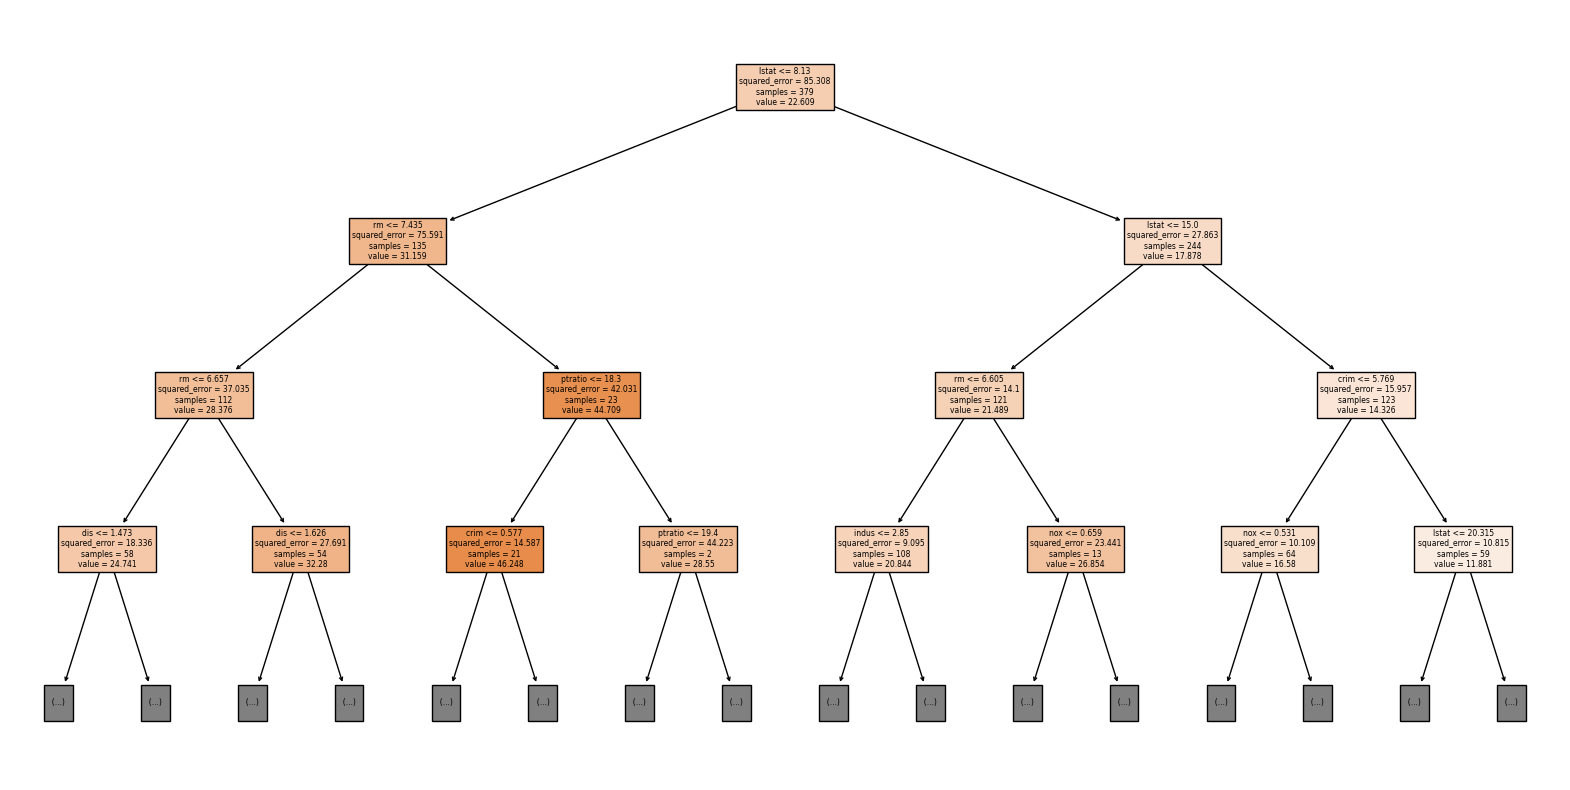

In [ ]:
# 시각화 함수 임포트
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 깊이가 8인데.. 상단의 주요한 의사결정만 확인하면 된다.
# 이미지 크기 재설정
plt.figure(figsize=(20,10))

# 그래프 생성 및 출력
plot_tree(best_dt,max_depth=3,feature_names=X_train.columns,filled=True)
plt.show()

[3.40024827e-02 0.00000000e+00 5.97085814e-03 5.66312454e-06
 1.57476530e-02 2.44034914e-01 2.31950750e-03 4.95238255e-02
 5.03781909e-03 1.29433036e-02 3.15202244e-02 3.87553992e-03
 5.95018209e-01]
lstat      0.595018
rm         0.244035
dis        0.049524
crim       0.034002
ptratio    0.031520
nox        0.015748
tax        0.012943
indus      0.005971
rad        0.005038
b          0.003876
age        0.002320
chas       0.000006
zn         0.000000
dtype: float64


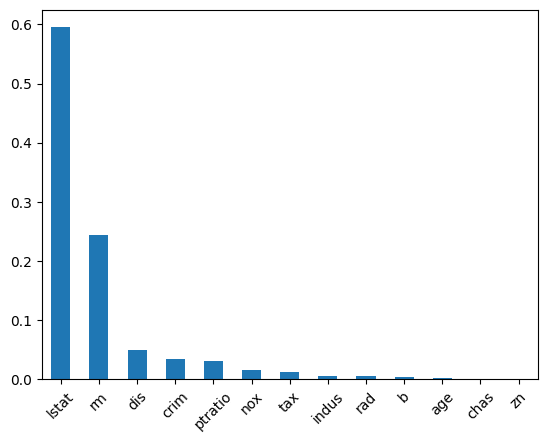

In [ ]:
# feature importance 추출 및 시각화 : 의사결정에 중요한 컬럼을 찾는 과정

# feature importance 추출
importances = best_dt.feature_importances_
print(importances)

# 1차원 배열 --> Series 자료형 생성
s_importances = pd.Series(data=importances, index=X_train.columns)
print(s_importances.sort_values(ascending=False))

# Series 자료형 --> 내림차순 정렬 + 시각화
s_importances.sort_values(ascending=False).plot(kind='bar',rot=45)
plt.show()

In [ ]:
pred_test = best_dt.predict(X_test)
pred_test

array([23.77692308, 23.56923077, 20.83392857, 16.3       , 20.83392857,
       19.975     , 20.83392857, 20.94      , 20.83392857, 16.1       ,
       11.38571429, 17.9       , 13.91666667,  8.8       , 50.        ,
       33.32307692, 20.83392857, 33.32307692, 22.8       , 19.975     ,
       23.77692308, 20.83392857, 20.83392857, 23.77692308, 20.83392857,
       10.9       , 16.2       , 15.075     , 38.7       , 18.28181818,
       12.85714286, 20.83392857, 23.56923077, 18.57777778, 23.56923077,
       20.83392857, 10.2       , 22.6       , 12.85714286, 17.9       ,
       23.56923077, 20.83392857, 23.56923077, 12.85714286, 22.        ,
       20.94      , 22.2       , 13.95833333, 15.075     , 28.55      ,
       13.95833333, 18.28181818, 20.83392857, 35.2       , 13.95833333,
       19.5       , 18.57777778, 18.57777778, 10.9       , 22.2       ,
       21.8       , 20.83392857, 33.32307692, 22.8       , 20.83392857,
       24.125     , 15.76666667, 19.4       ,  9.45      , 20.83

###→ 모델평가

In [ ]:
# 모델평가에 필요한 함수 임포트
from sklearn.metrics import mean_squared_error as mse

# 평가용 데이터에 대한 성능 평가
mse_test = mse(y_test,pred_test)

# 결과 확인하기
print(f'평가용 데이터에 대한 성능 : {mse_test}')

평가용 데이터에 대한 성능 : 26.767641767448996


##■ RandomForest 회귀모델을 이용한 주택가격 예측

###→ 모델 생성

In [ ]:
# GridSearchCV 함수 실행

# 필요한 함수 임포트
from sklearn.ensemble import RandomForestRegressor

# 최적화할 기본 모델 생성
base_rf = RandomForestRegressor(random_state=0)

# 튜닝할 매개변수 설정
params = {'n_estimators':[100,200,300,400]}

# GridSearchCV 함수 실행
grid_rf = GridSearchCV(estimator=base_rf,
                       param_grid=params,
                       cv=10,
                       scoring='neg_mean_squared_error')

# 학습 및 평가
grid_rf.fit(X_train,y_train)

# 최적의 하이퍼파라미터 확인
grid_rf.best_params_

{'n_estimators': 100}

In [ ]:
# best model 생성
best_rf = RandomForestRegressor(n_estimators=100,random_state=0)

###→ 모델 학습

In [ ]:
best_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

###→ feature importance 추출 및 시각화

[0.0415447  0.00111934 0.00686457 0.00065046 0.01583583 0.41649501
 0.0123852  0.04328003 0.00408455 0.01801769 0.02121896 0.01100157
 0.40750211]
rm         0.416495
lstat      0.407502
dis        0.043280
crim       0.041545
ptratio    0.021219
tax        0.018018
nox        0.015836
age        0.012385
b          0.011002
indus      0.006865
rad        0.004085
zn         0.001119
chas       0.000650
dtype: float64


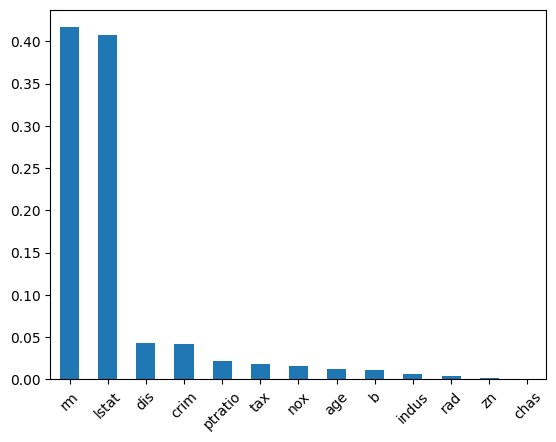

In [ ]:
# RandomForest는

# feature importance 추출 및 시각화 : 의사결정에 중요한 컬럼을 찾는 과정

# feature importance 추출
importances = best_rf.feature_importances_
print(importances)

# 1차원 배열 --> Series 자료형 생성
s_importances = pd.Series(data=importances, index=X_train.columns)
print(s_importances.sort_values(ascending=False))

# Series 자료형 --> 내림차순 정렬 + 시각화
s_importances.sort_values(ascending=False).plot(kind='bar',rot=45)
plt.show()

In [ ]:
'''
DecisionTree 회귀모델, RandomForest 회귀모델 모두 zn, chas 컬럼은 거의 사용하지 않았다.(중요도가 낮다)
--> 학습용 데이터에서 zn, chas 컬럼을 제거하면, 다른 컬럼에 영향을 미칠 수도 있다.
--> 컬럼간의 관계를 모르기 때문에 두 컬럼을 빼고 해봐야 그 결과를 알수 있다.
'''

In [ ]:
pred_test = best_rf.predict(X_test)

###→ 모델평가

In [ ]:
# 평가용 데이터에 대한 성능 평가
mse_test = mse(y_test,pred_test)

# 결과 확인
print(f'평가용 데이터에 대한 성능 : {mse_test}')

# 18000 - 24000 사이에서 오차가 나온다.

평가용 데이터에 대한 성능 : 16.726365055118123


##■ XGBoost 회귀모델을 이용한 주택가격 예측

In [ ]:
# 필요한 라이브러리 설치 및 임포트
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

###→ 모델 생성

In [ ]:
# 처음부터 최적화 : GridSearchCV 함수 실행

# 최적화할 기본모델 생성
base_xgb = XGBRegressor(random_state=0)

# 튜닝할 매개변수
params = {'learning_rate':[0.05,0.1,0.2,0.3],
          'n_estimators':[100,200,300],
          'max_depth':[3,4,5,6,7]}

# GridSearchCV 함수 실행
grid_xgb = GridSearchCV(estimator=base_xgb,
                       param_grid=params,
                       cv=10,
                       scoring='neg_mean_squared_error')

# 학습 및 평가
grid_xgb.fit(X_train,y_train)

# 최적의 하이퍼파라미터 확인
grid_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}

In [ ]:
# best model 생성
best_xgb = XGBRegressor(learning_rate=0.2,n_estimators=100,max_depth=4,random_state=0)

###→ 모델 학습

In [ ]:
best_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

###→ feature importance 추출 및 시각화

[0.02171523 0.01325853 0.01276325 0.01091325 0.02548396 0.17800835
 0.00747004 0.04280962 0.00920386 0.04751392 0.06870233 0.01279074
 0.54936695]
lstat      0.549367
rm         0.178008
ptratio    0.068702
tax        0.047514
dis        0.042810
nox        0.025484
crim       0.021715
zn         0.013259
b          0.012791
indus      0.012763
chas       0.010913
rad        0.009204
age        0.007470
dtype: float32


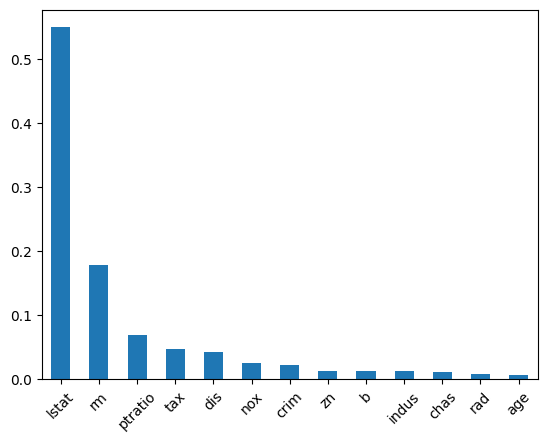

In [ ]:
# feature importance 추출
importances = best_xgb.feature_importances_
print(importances)

# 1차원 배열 --> Series 자료형 생성
s_importances = pd.Series(data=importances,index=X_train.columns)
print(s_importances.sort_values(ascending=False))

# Series 자료형 --> 내림차순 정렬 + 시각화
s_importances.sort_values(ascending=False).plot(kind='bar',rot=45)
plt.show()

###→ 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_xgb.predict(X_test)
print(pred_test)

[23.192486  30.447199  23.563242  10.946942  21.453901  20.652166
 20.264326  20.222776  24.848457  18.72189    6.9792976 15.635205
 15.331492   9.173862  48.6569    33.849873  20.98793   35.956837
 28.481127  22.55496   23.310303  21.886475  19.693792  25.4823
 20.553263  19.687283  18.113663  17.370575  37.35016   18.565657
 16.301062  18.242847  19.313652  21.017973  23.682978  16.991838
  7.237965  29.56685   13.454431  13.505874  23.327139  21.082949
 21.872765  16.643913  22.805672  20.911436  20.663013  17.795303
 15.466414  26.328953  16.847292  21.358448  21.483591  32.36435
 13.983922  18.982994  19.267014  19.085993  19.034729  20.577892
 21.790657  21.063328  32.800434  30.412586  20.893208  29.135538
 16.608093  18.170095  15.431118  23.63389   20.091108  22.164083
 24.886765  31.581116  28.900925   9.937636  40.48493   22.408072
 22.789585  21.079048  26.491331  18.358612  18.643837  42.059044
 39.109932  23.86515   22.144224  15.902811  27.397713  15.233265
 17.605299  1

###→ 모델 평가

In [ ]:
# 평가용 데이터를 이용한 성능 평가
mse_test = mse(y_test,pred_test)

# 결과 확인
print(mse_test)

'''
여기서는 RandomForest 모델보다 성능이 떨어진다.
'''

17.214286667385103


'\nRandomForest 모델보다 성능이 떨어진다.\n'

##■ LightGBM 회귀모델을 이용한 주택가격 예측

In [ ]:
# 필요한 라이브러리 설치 및 임포트
!pip install lightgbm
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

###→ 모델 생성

In [ ]:
# 처음부터 최적화 : GridSearchCV 함수 실행

# 최적화할 기본모델 생성
base_lgbm = LGBMRegressor(random_state=0)

# 튜닝할 매개변수
params = {'learning_rate':[0.05,0.1,0.2,0.3],
          'n_estimators':[50,100,200,300],
          'max_depth':[3,4,5,6,7]}

# GridSearchCV 함수 실행
grid_lgbm = GridSearchCV(estimator=base_lgbm,
                       param_grid=params,
                       cv=10,
                       scoring='neg_mean_squared_error')

# 학습 및 평가
grid_lgbm.fit(X_train,y_train)

# 최적의 하이퍼파라미터 확인
grid_lgbm.best_params_

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}

In [ ]:
best_lgbm = LGBMRegressor(learning_rate=0.2,n_estimators=300,max_depth=3,random_state=0)

###→ 모델 학습

In [ ]:
best_lgbm.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 379, number of used features: 13
[LightGBM] [Info] Start training from score 22.608707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMRegressor(learning_rate=0.2, max_depth=3, n_estimators=300, random_state=0)

###→ feature importance 추출 및 시각화

[178  14  36  13  85 210 157 180  19  67  65 134 193]
rm         210
lstat      193
dis        180
crim       178
age        157
b          134
nox         85
tax         67
ptratio     65
indus       36
rad         19
zn          14
chas        13
dtype: int32


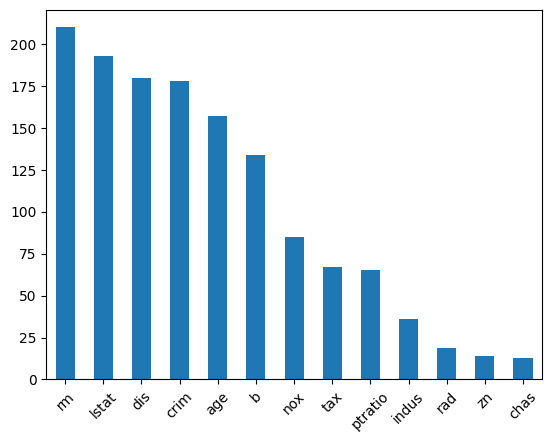

In [ ]:
# feature importance 추출
importances = best_lgbm.feature_importances_
print(importances)

# 1차원 배열 --> Series 자료형 생성
s_importances = pd.Series(data=importances,index=X_train.columns)
print(s_importances.sort_values(ascending=False))

# Series 자료형 --> 내림차순 정렬 + 시각화
s_importances.sort_values(ascending=False).plot(kind='bar',rot=45)
plt.show()

###→ 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_lgbm.predict(X_test)

###→ 모델 평가

In [ ]:
# 평가용 데이터를 이용한 성능 평가
mse_test = mse(y_test,pred_test)

# 결과 확인
print(mse_test)
'''
대체로 데이터가 10,000건 이하일 경우 성능이 떨어진다.
'''

19.3398865733525


'\n여기서는 RandomForest 모델보다 성능이 떨어진다.\n'